# Proyecto Final AWS- Ciencia de Datos en Python

In [91]:
#Importamos librerias
import configparser
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
config = configparser.ConfigParser()
config.read('untitled.txt')

['untitled.txt']

In [93]:
print(config.sections())


['DWH', 'VPC']


In [94]:
RDS_HOSTNAME = 'e-dreams-dwh.ch62gk4wowqh.us-east-1.rds.amazonaws.com'

In [95]:
mysql_driver = f"""mysql+pymysql://{config.get('DWH', 'DWH_USER')}:{config.get('DWH', 'DWH_PASSWORD')}@{RDS_HOSTNAME}:{config.get('DWH', 'DWH_PORT')}/{config.get('DWH', 'DWH_NAME')}"""  

### Leemos las tablas de la base de datos 

In [96]:
query_articulo = 'SELECT * FROM dim_articulo;'
dim_articulo = pd.read_sql(query_articulo, mysql_driver)
#dim_articulo

In [97]:
query_fecha = 'SELECT * FROM dim_fecha;'
dim_fecha = pd.read_sql(query_fecha, mysql_driver)
#dim_fecha

In [98]:
query_persona = 'SELECT * FROM dim_persona;'
dim_persona = pd.read_sql(query_persona, mysql_driver)
#dim_persona

In [99]:
query_usuario = 'SELECT * FROM dim_usuario;'
dim_usuario = pd.read_sql(query_usuario, mysql_driver)
#dim_usuario

In [100]:
query_ingresos = 'SELECT * FROM fact_ingresos;'
fact_ingresos = pd.read_sql(query_ingresos, mysql_driver)
#fact_ingresos

In [101]:
query_ventas = 'SELECT * FROM fact_ventas;'
fact_ventas = pd.read_sql(query_ventas, mysql_driver)
#fact_ventas

## Preguntas de negocio

### Las preguntas de negicio son las siguientes:

1. ¿Cuáles son los articulos más vendidos?

2. ¿Cuál es el proveedor más relevante?

3.  Análisis de DOH (Días de Inventario en Mano)

4. Cual es la estacionalidad de los articulos mas vendidos por mes y año?

5. ¿Cuáles son los articulos por categoria que pagan mas impuestos?


### Pregunta 1. ¿Cuáles son los articulos más vendidos?

In [102]:
#Unimos las tablas de fact_Ventas con dim_articulo para obtener el detalle de los id_articulo
df_ventas_arti = pd.merge(fact_ventas, dim_articulo, on='id_articulo')
df_ventas_arti

,sk_fact_ventas,id_detalle_venta,id_venta,id_articulo,id_fecha,cantidad,precio,descuento,id_persona,id_usuario,total,impuesto,id_categoria,codigo,nombre,precio_venta,descripcion,imagen,nombre_categoria,descripcion_categoria
0,1,0,995,273,20230410,52,47.75,0.29,8,563,2467.92,296.150,10015,24209,thank,38.38,Production new sea movie return policy out. La...,Participant laugh.,Golosinas,"Chocolates, dulces"
1,134,1614,737,273,20210327,127,75.66,0.62,9,2033,12381.60,1485.790,10015,24209,thank,38.38,Production new sea movie return policy out. La...,Participant laugh.,Golosinas,"Chocolates, dulces"
2,1998,1044,980,273,20240406,127,18.06,0.43,5,8005,3437.85,412.542,10015,24209,thank,38.38,Production new sea movie return policy out. La...,Participant laugh.,Golosinas,"Chocolates, dulces"
3,2051,825,966,273,20200710,127,77.36,0.93,8,5674,50061.65,6007.400,10015,24209,thank,38.38,Production new sea movie return policy out. La...,Participant laugh.,Golosinas,"Chocolates, dulces"
4,2,159,995,948,20230410,127,31.18,0.10,8,563,4630.92,555.710,10015,21150,important,48.25,Material two garden worker tend bill.\nNation ...,Positive serious.,Golosinas,"Chocolates, dulces"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2978,2660,712,238,20200714,127,24.65,0.79,4,4541,22070.50,2648.460,10018,46990,his,96.10,Man feeling state thus. Site true experience c...,Civil prove.,MuebleCaja,articulos de muebles de caja
2996,2979,2676,943,788,20200417,127,92.64,0.98,6,3084,73786.30,8854.360,10025,47907,lay,36.35,Indicate everyone member information law magaz...,Tonight girl into.,gorros,gorros para frio
2997,2981,2708,810,347,20210806,120,69.15,0.55,4,656,8232.00,987.840,10018,23112,policy,73.71,Result use force fact yes car society. Score r...,Staff bar school us.,MuebleCaja,articulos de muebles de caja
2998,2998,2941,502,623,20210901,127,76.70,0.47,4,8083,42993.72,5159.250,10008,85540,activity,98.77,Point exist organization foreign. Possible non...,Lawyer million.,comestibles,comida


In [103]:
# Cuantificamos la cantidad de articulos por categoria
df_ventas_por_categoria = df_ventas_arti.groupby('nombre_categoria')['cantidad'].sum().reset_index()
print('Los articulos mas vendidos por categoria son:')
df_ventas_por_categoria



Los articulos mas vendidos por categoria son:


,nombre_categoria,cantidad
0,AlimentoMascotas,65928
1,Golosinas,72392
2,MuebleCaja,71611
3,comestibles,73979
4,gorros,72276


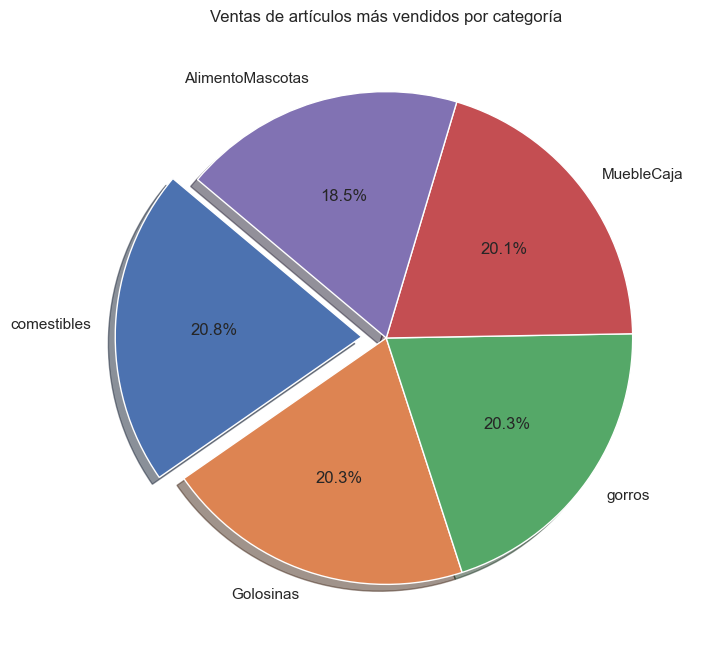

In [104]:
#Ordenamos los valores por la columna cantidad
df_ventas_por_categoria = df_ventas_por_categoria.sort_values('cantidad', ascending=False)

# Crear un gráfico circular con efecto de sombra
plt.figure(figsize=(10, 8))
plt.pie(df_ventas_por_categoria['cantidad'],
        labels=df_ventas_por_categoria['nombre_categoria'],
        autopct='%1.1f%%', startangle=140,
        shadow=True,  # Añade sombra para un efecto 3D
        explode=[0.1 if i == df_ventas_por_categoria['cantidad'].idxmax() else 0 for i in df_ventas_por_categoria.index])  # 'Explode' el slice más grande

plt.title('Ventas de artículos más vendidos por categoría')

# Mostrar el gráfico
plt.show()

#### R// Los articulos más venidos corresponde a la categoría de comestibles con un 20.8% de las ventas registradas. 

### Pregunta 2. ¿Cuál es el proveedor más relevante?

In [105]:
# Agrupar por 'id_usuario' y sumamos la columna 'cantidad'
ventas_por_proveedor = fact_ingresos.groupby('id_usuario')['cantidad'].sum().reset_index()

# Ordenar los resultados para ver los proveedores con más ventas
ventas_por_proveedor.sort_values('cantidad', ascending=False, inplace=True)

print(ventas_por_proveedor.head())

     id_usuario  cantidad
420        4769      1368
73          587      1351
337        3857      1270
112        1091      1254
182        1993      1250


In [106]:
proveedores_con_nombre = pd.merge(ventas_por_proveedor, dim_usuario, on='id_usuario', how='left')

# Selecciona solo las columnas deseadas
proveedores_con_nombre = proveedores_con_nombre[['id_usuario', 'nombre', 'cantidad']]

# Ahora proveedores_con_nombre tendrá 'id_usuario', 'cantidad' (ventas) y 'nombre'
proveedores_con_nombre  # Muestra los resultados con nombres


,id_usuario,nombre,cantidad
0,4769,Lawrence Higgins,1368
1,587,Andrew Sandoval,1351
2,3857,Mrs. Brittney Cruz,1270
3,1091,Lisa Alexander,1254
4,1993,Todd Key,1250
...,...,...,...
911,8397,Julian Gutierrez,32
912,270,Kristi May,26
913,4175,Joshua Aguilar,26
914,6414,Matthew Levy,13


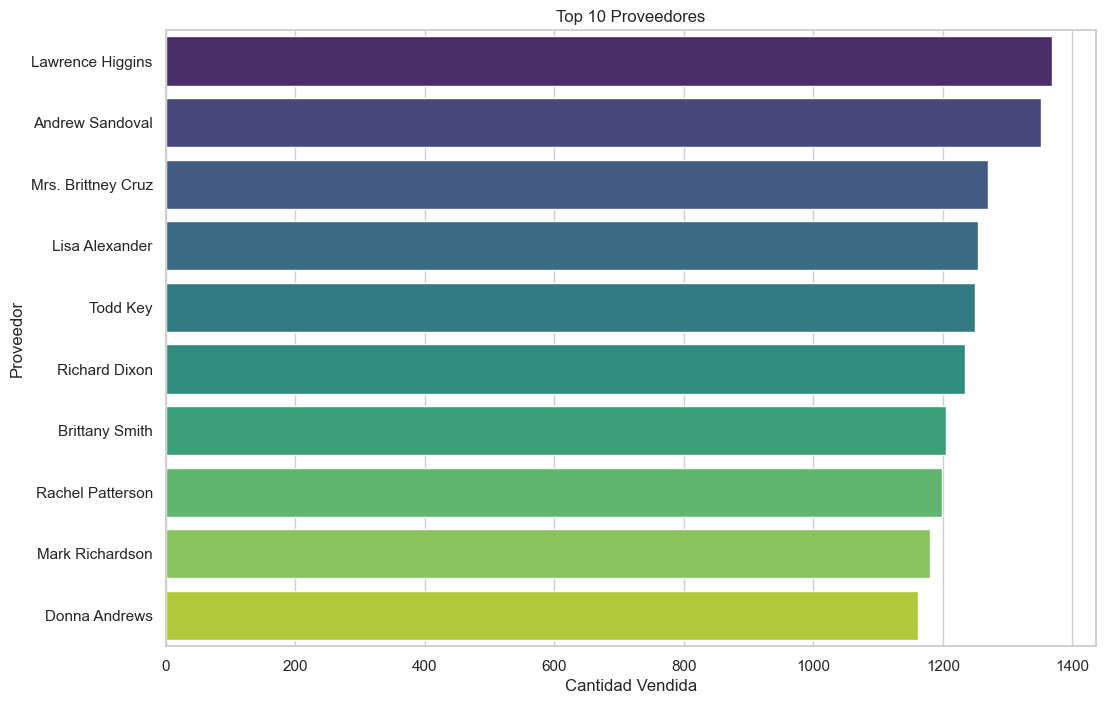

In [107]:
# Ordenamos los datos por cantidad vendida de forma descendente
proveedores_con_nombre.sort_values('cantidad', ascending=False, inplace=True)

# Configuramos al estilo Seaborn
sns.set(style="whitegrid")

# Creamos un gráfico de barras, mostrando el top 10 
plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='cantidad', y='nombre', data=proveedores_con_nombre.head(10), palette='viridis')

# Añade títulos y etiquetas
plt.title('Top 10 Proveedores')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Proveedor')

# Ajusta las etiquetas del eje y
plt.yticks(rotation=0)

# Muestra el gráfico
plt.show()


#### R// EL proveedor más relevante es Lawrence Higgins con 1368 articulos vendidos a la empresa

### Pregunta 3.  Análisis de DOH (Días de Inventario en Mano)

El análisis de DOH (Días de Inventario en Mano) es un indicador clave de rendimiento (KPI) utilizado en la gestión de inventarios que mide la cantidad de días que un inventario promedio se mantiene antes de ser vendido o utilizado. En otras palabras, indica cuánto tiempo toma convertir el inventario en ventas. Se calcula como:

$DOH = \left( \frac{\text{Inventario Promedio}}{\text{Costo de Bienes Vendidos}} \right) \times \text{Días del Período}$
ó

$DOH = \left( \frac{\text{Inventario Promedio}}{\text{Ventas Diarias}} \right)$


Donde: 
-Inventario Promedio es el valor medio del inventario durante un período específico, que a menudo se calcula tomando la media del inventario al principio y al final del período.

-Costo de Bienes Vendidos (COGS) es el costo directo atribuible a la producción de los bienes vendidos por una empresa.

-Ventas Diarias es el total de ventas durante el período dividido por el número de días en ese período.

In [108]:
fact_ventas['id_fecha'] = pd.to_datetime(fact_ventas['id_fecha'], format='%Y%m%d')
fact_ventas['año'] = fact_ventas['id_fecha'].dt.year
fact_ventas['mes'] = fact_ventas['id_fecha'].dt.month
fact_ventas['día'] = fact_ventas['id_fecha'].dt.day

# Calculamos las ventas diarias promedio por artículo
ventas_diarias = fact_ventas.groupby(['id_articulo', 'año', 'mes', 'día'])['cantidad'].sum().reset_index()
ventas_diarias_promedio = fact_ventas.groupby('id_articulo')['cantidad'].mean().reset_index()


In [109]:
fact_ingresos['id_fecha'] = pd.to_datetime(fact_ingresos['id_fecha'], format='%Y%m%d')
inventario_actual = fact_ingresos.groupby('id_articulo')['cantidad'].sum().reset_index()


In [110]:
# Combinamos los DataFrames
doh = pd.merge(inventario_actual, ventas_diarias_promedio, on='id_articulo')

# Calculamos el DOH
doh['doh'] = doh['cantidad_x'] / doh['cantidad_y']


In [111]:
df_detalles_articulo = dim_articulo[['id_articulo', 'nombre_categoria', 'descripcion_categoria']]

# Combinamoos los detalles de categoría con el DOH
doh_final = pd.merge(doh, df_detalles_articulo, on='id_articulo')


In [112]:
# Ordenamos por DOH para mostrar los artículos con más y menos días de inventario en mano
doh_final.sort_values('doh', ascending=False, inplace=True)

doh_final = doh_final[['id_articulo', 'nombre_categoria', 'descripcion_categoria', 'doh']]

# Mostrar el resultado final
doh_final


,id_articulo,nombre_categoria,descripcion_categoria,doh
57,62,MuebleCaja,articulos de muebles de caja,381.000000
512,578,gorros,gorros para frio,230.500000
100,113,gorros,gorros para frio,190.500000
447,502,MuebleCaja,articulos de muebles de caja,95.250000
380,424,gorros,gorros para frio,18.142857
...,...,...,...,...
227,256,comestibles,comida,0.241379
469,527,AlimentoMascotas,Mascotas,0.164729
188,213,Golosinas,"Chocolates, dulces",0.159664
335,377,MuebleCaja,articulos de muebles de caja,0.133858


In [113]:
# Obtener la fila con el valor mínimo de DOH
fila_min_doh = doh_final.loc[doh_final['doh'].idxmin()]
print("La fila con el valor mínimo de DOH es:")
print(fila_min_doh)

# Obtener la fila con el valor máximo de DOH
fila_max_doh = doh_final.loc[doh_final['doh'].idxmax()]
print("La fila con el valor máximo de DOH es:")
print(fila_max_doh)


La fila con el valor mínimo de DOH es:
id_articulo                      314
nombre_categoria         comestibles
descripcion_categoria         comida
doh                         0.023622
Name: 278, dtype: object
La fila con el valor máximo de DOH es:
id_articulo                                        62
nombre_categoria                           MuebleCaja
descripcion_categoria    articulos de muebles de caja
doh                                             381.0
Name: 57, dtype: object


R// El analisis previo muestra que los valores de DOH indican la rapidez con la que los artículos de una categoría se están vendiendo. Un DOH más bajo significa que el inventario de esa categoría se está vendiendo y reponiendo más rápidamente. En nuestro modelo el articulo que pasa menos tiempo en inventariado es el 314, que corresponde a la categoria de comestibles. Mientras que el articulo con mayor tiempo en stock es el 62 de la categoria de MuebleCaja

### Pregunta 4. Cual es la estacionalidad de los articulos mas vendidos por mes y año?

In [114]:
#Agrupar por año, mes y id_articulo para obtener la cantidad total vendida.
ventas_agrupadas = fact_ventas.groupby(['año', 'mes', 'id_articulo'])['cantidad'].sum().reset_index()

#Para cada grupo de año y mes, encontramos el id_articulo con la mayor cantidad de ventas.
top_ventas_por_mes = ventas_agrupadas.sort_values('cantidad', ascending=False).drop_duplicates(subset=['año', 'mes'])

# Aca unimos con dim_articulo para obtener nombre_categoria.
top_ventas_con_categoria = top_ventas_por_mes.merge(dim_articulo[['id_articulo', 'nombre_categoria']], on='id_articulo', how='left')

# Ordenar el resultado final 
top_ventas_con_categoria.sort_values(by=['año', 'mes'], inplace=True)
top_ventas_con_categoria.reset_index(drop=True, inplace=True)

#top_ventas_con_categoria

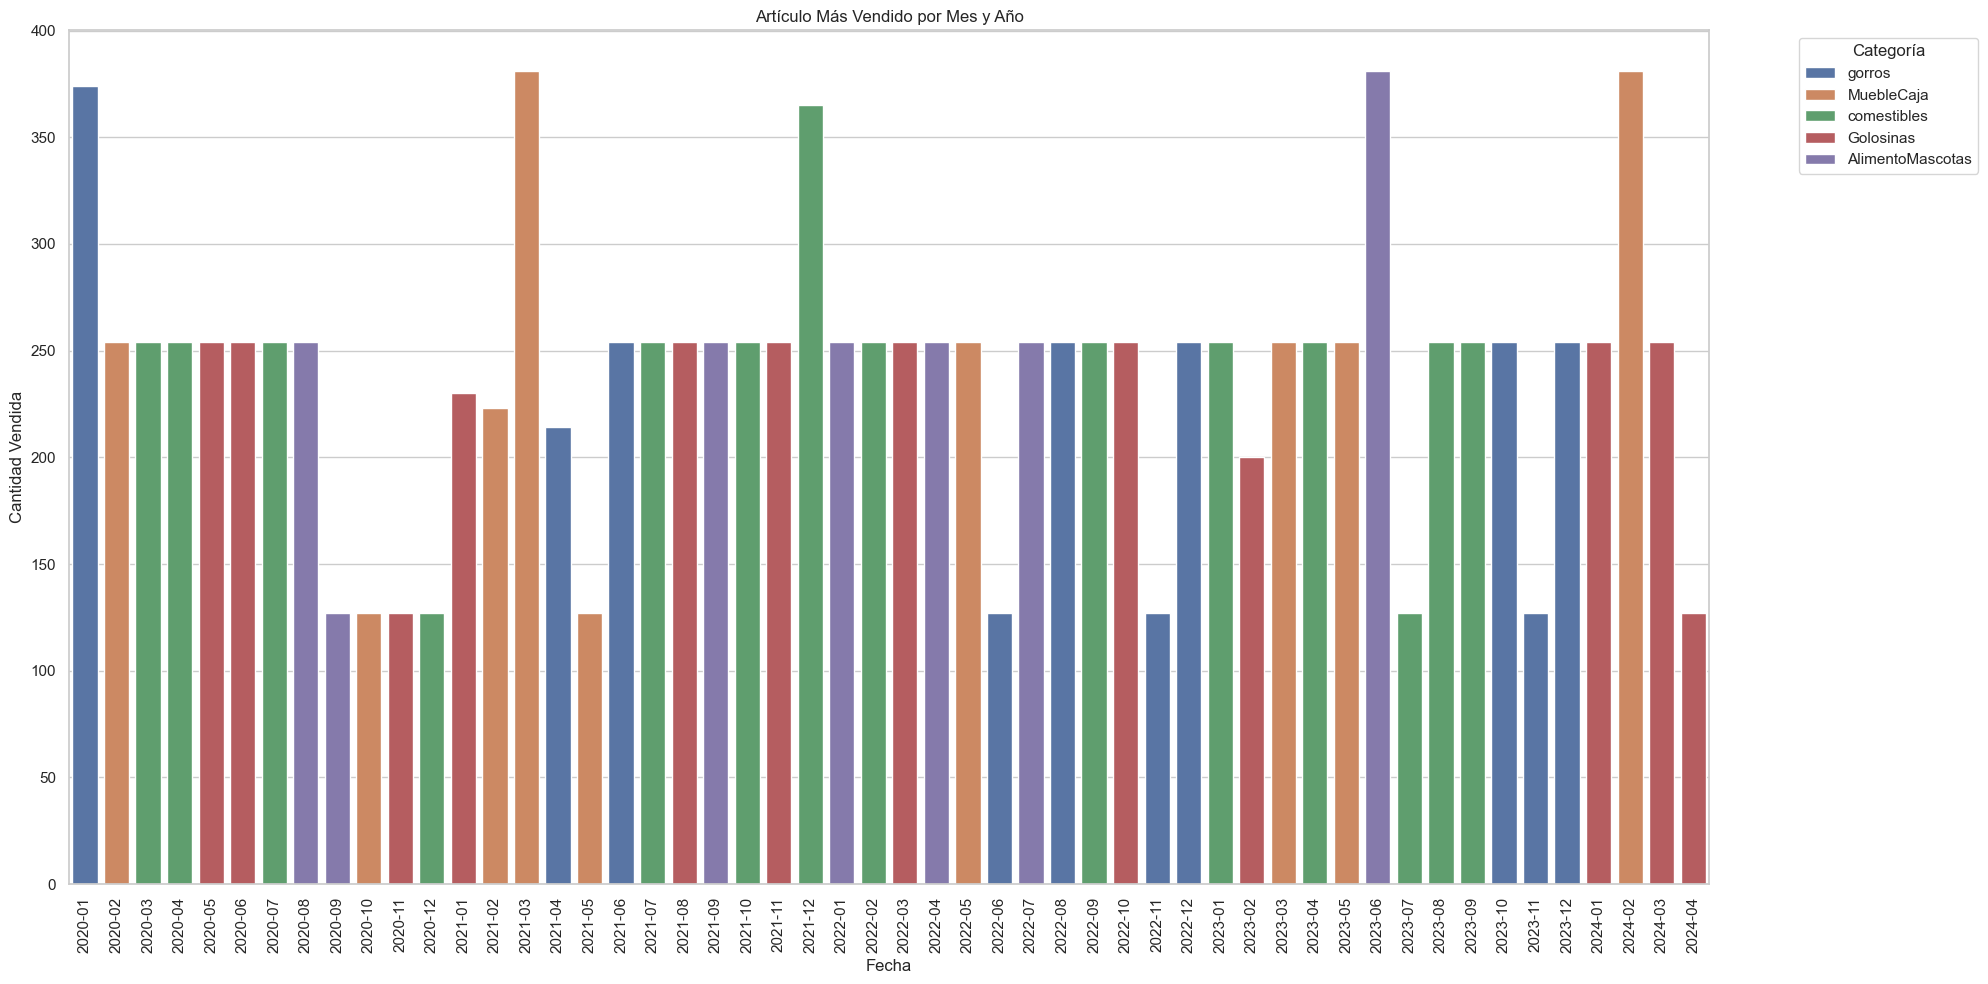

In [115]:
# Convertimos mes a un formato de cadena para que sea más legible 
top_ventas_con_categoria['mes'] = top_ventas_con_categoria['mes'].astype(int).apply(lambda x: f'{x:02d}')

# Concatenamos año y mes
top_ventas_con_categoria['año_mes'] = top_ventas_con_categoria.apply(lambda x: f"{x['año']}-{x['mes']}", axis=1)

# Ordenar por año y mes para la grafica
top_ventas_con_categoria.sort_values(by=['año', 'mes'], inplace=True)

# Creamos el gráfico de barras
plt.figure(figsize=(20, 10))
sns.barplot(data=top_ventas_con_categoria, x='año_mes', y='cantidad', hue='nombre_categoria', dodge=False)
plt.title('Artículo Más Vendido por Mes y Año')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=90)  # Rota las etiquetas del eje X para mejorar legibilidad.
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left')  # Mueve la leyenda fuera del gráfico.

# Mostrar el gráfico.
plt.tight_layout()
plt.show()


R// La gráfica muestra los artículos por categoria nas vendidos por mes y año, esto nos permite observar el comportamiento
de los articulos mas comprados por nuestros clientes que pueden analizarse a detalle para establecer patrones o tendencias en las compras y de este modo preparse con antificipación para mantener los productos disponibles.

### Pregunta 5. ¿Cuáles son los articulos por categoria que pagan mas impuestos?

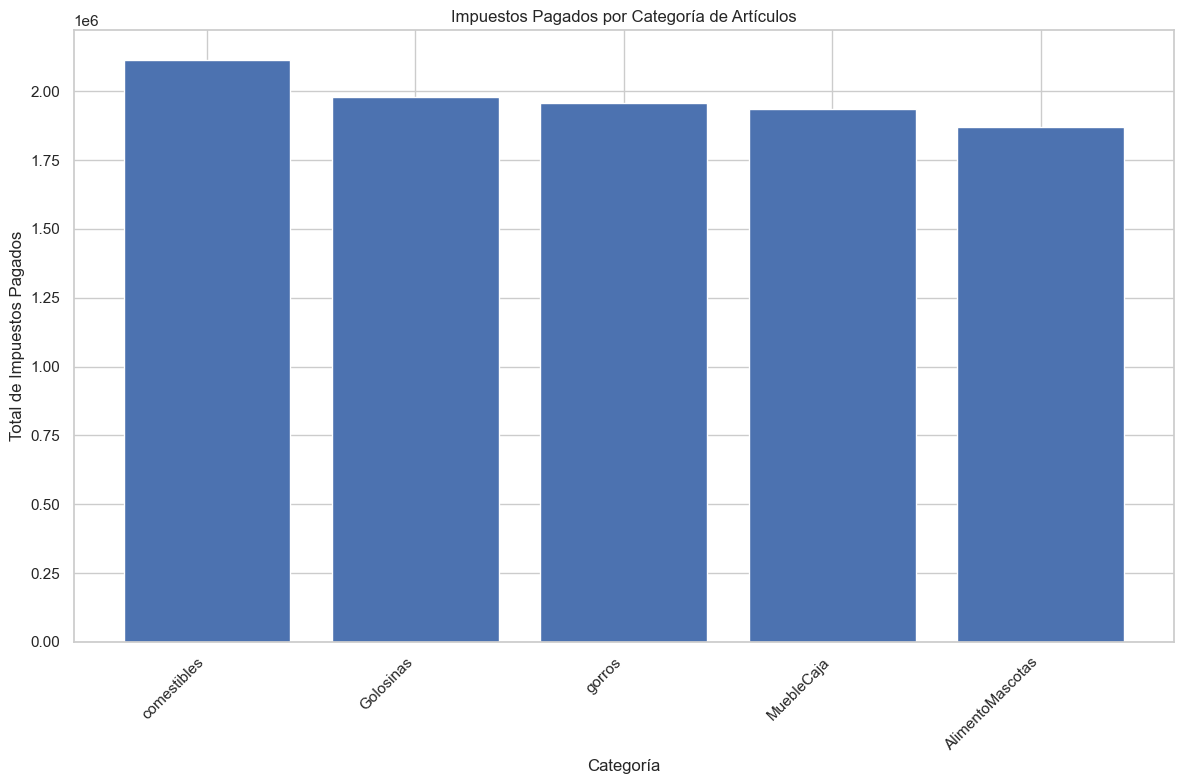

In [116]:
# Unimos la tabla de fact_ventas con dim_articulo para obtener el nombre de la categoría para cada artículo
fact_ventas_con_categoria = fact_ventas.merge(dim_articulo[['id_articulo', 'nombre_categoria']], on='id_articulo', how='left')

# Agrupar por nombre_categoria y sumar el impuesto.
impuestos_por_categoria = fact_ventas_con_categoria.groupby('nombre_categoria')['impuesto'].sum().reset_index()

# Ordenar los resultados para ver las categorías con más impuestos pagados.
impuestos_por_categoria = impuestos_por_categoria.sort_values('impuesto', ascending=False)

plt.figure(figsize=(12, 8))
plt.bar(impuestos_por_categoria['nombre_categoria'], impuestos_por_categoria['impuesto'])
plt.xlabel('Categoría')
plt.ylabel('Total de Impuestos Pagados')
plt.title('Impuestos Pagados por Categoría de Artículos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


R// Los articulos por categoria que mas pagan impuestos son los asociados a comestibles ($~2e6$) seguido de la categoria de Golosinas ($~1.9e6$).

### 